In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [3]:
type(data)

dict

In [4]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11919,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.982004e+07,1.982004e+07,False,NaN,1,NaN,NaN,None,2025-02-05T15:55:00.000Z,98164.014543,5.935697e+10,-19.9064,-0.379877,-1.442398,-3.760270,-4.043544,-1.588810,29.187344,1.945615e+12,60.4285,2.061444e+12,None,2025-02-05T15:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-05 16:58:16.375522
1,1027,Ethereum,ETH,ethereum,9917,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205263e+08,1.205263e+08,True,NaN,2,NaN,NaN,None,2025-02-05T15:55:00.000Z,2773.179296,3.907697e+10,-18.6123,-0.779816,-0.672058,-10.580597,-25.173069,-30.828293,-2.668573,3.342409e+11,10.3732,3.342409e+11,None,2025-02-05T15:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-05 16:58:16.375522
2,52,XRP,XRP,xrp,1522,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.770373e+10,9.998654e+10,False,NaN,3,NaN,NaN,None,2025-02-05T15:55:00.000Z,2.506322,9.195040e+09,-43.3822,-0.962043,-4.886480,-18.270789,2.909174,-0.943056,356.085004,1.446241e+11,4.4902,2.506322e+11,None,2025-02-05T15:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-05 16:58:16.375522
3,825,Tether USDt,USDT,tether,115549,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.404787e+11,1.425729e+11,True,NaN,4,NaN,NaN,None,2025-02-05T15:55:00.000Z,1.000311,1.218915e+11,-25.5745,-0.005734,-0.032628,0.056699,0.029323,-0.067424,-0.035826,1.405225e+11,4.3611,1.426173e+11,None,2025-02-05T15:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-05 16:58:16.375522
4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.870489e+08,5.933885e+08,True,NaN,5,NaN,NaN,None,2025-02-05T15:55:00.000Z,202.278575,5.125884e+09,-34.6481,-1.565571,-6.470804,-11.452113,-8.510323,-15.982914,5.369151,9.851956e+10,3.0588,1.200298e+11,None,2025-02-05T15:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-05 16:58:16.375522


In [6]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)



    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\user\Desktop\Davischoice\portfolio_project\Automate_API\API.csv'):
        df.to_csv(r'C:\Users\user\Desktop\Davischoice\portfolio_project\Automate_API\API.csv')
    else:
        df.to_csv(r'C:\Users\user\Desktop\Davischoice\portfolio_project\Automate_API\API.csv', mode='a', header=False)
        
   

In [7]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed


KeyboardInterrupt: 

In [8]:
df77 = pd.read_csv('API.CSV')
df77.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11919,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.981975e+07,1.981975e+07,False,NaN,1,NaN,NaN,NaN,2025-02-04T22:26:00.000Z,97157.115585,7.201262e+10,-39.8087,-0.319544,-4.880090,-3.516060,-1.371545,-3.462547,28.222013,1.925629e+12,60.6728,2.040299e+12,NaN,2025-02-04T22:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-04 23:27:29.481582
1,1,1027,Ethereum,ETH,ethereum,9917,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.205239e+08,1.205239e+08,True,NaN,2,NaN,NaN,NaN,2025-02-04T22:26:00.000Z,2672.916225,4.865511e+10,-49.4203,-1.075357,-7.746544,-12.894271,-26.628089,-33.870099,-0.796547,3.221504e+11,10.1359,3.221504e+11,NaN,2025-02-04T22:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-04 23:27:29.481582
2,2,52,XRP,XRP,xrp,1522,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.770373e+10,9.998654e+10,False,NaN,3,NaN,NaN,NaN,2025-02-04T22:26:00.000Z,2.487455,1.404004e+10,-63.3734,-0.855761,-8.735826,-18.531376,3.913514,3.549062,358.016130,1.435354e+11,4.5204,2.487455e+11,NaN,2025-02-04T22:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-04 23:27:29.481582
3,3,825,Tether USDt,USDT,tether,115464,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,1.404787e+11,1.425729e+11,True,NaN,4,NaN,NaN,NaN,2025-02-04T22:26:00.000Z,1.000526,1.553206e+11,-48.8978,0.004984,-0.013009,0.081465,0.069977,-0.104837,-0.030233,1.405526e+11,4.4222,1.426478e+11,NaN,2025-02-04T22:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-04 23:27:29.481582
4,4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.870582e+08,5.933962e+08,True,NaN,5,NaN,NaN,NaN,2025-02-04T22:26:00.000Z,203.894890,7.383115e+09,-53.8219,-1.023388,-6.074770,-9.887439,-4.782446,-14.420816,7.817542,9.930868e+10,3.1275,1.209905e+11,NaN,2025-02-04T22:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-04 23:27:29.481582


In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11919,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.982004e+07,1.982004e+07,False,NaN,1,NaN,NaN,None,2025-02-05T15:55:00.000Z,98164.014543,5.935697e+10,-19.9064,-0.379877,-1.442398,-3.760270,-4.043544,-1.588810,29.187344,1.945615e+12,60.4285,2.061444e+12,None,2025-02-05T15:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-05 16:58:21.311936
1,1027,Ethereum,ETH,ethereum,9917,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205263e+08,1.205263e+08,True,NaN,2,NaN,NaN,None,2025-02-05T15:55:00.000Z,2773.179296,3.907697e+10,-18.6123,-0.779816,-0.672058,-10.580597,-25.173069,-30.828293,-2.668573,3.342409e+11,10.3732,3.342409e+11,None,2025-02-05T15:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-05 16:58:21.311936
2,52,XRP,XRP,xrp,1522,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.770373e+10,9.998654e+10,False,NaN,3,NaN,NaN,None,2025-02-05T15:55:00.000Z,2.506322,9.195040e+09,-43.3822,-0.962043,-4.886480,-18.270789,2.909174,-0.943056,356.085004,1.446241e+11,4.4902,2.506322e+11,None,2025-02-05T15:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-05 16:58:21.311936
3,825,Tether USDt,USDT,tether,115549,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.404787e+11,1.425729e+11,True,NaN,4,NaN,NaN,None,2025-02-05T15:55:00.000Z,1.000311,1.218915e+11,-25.5745,-0.005734,-0.032628,0.056699,0.029323,-0.067424,-0.035826,1.405225e+11,4.3611,1.426173e+11,None,2025-02-05T15:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-05 16:58:21.311936
4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.870489e+08,5.933885e+08,True,NaN,5,NaN,NaN,None,2025-02-05T15:55:00.000Z,202.278575,5.125884e+09,-34.6481,-1.565571,-6.470804,-11.452113,-8.510323,-15.982914,5.369151,9.851956e+10,3.0588,1.200298e+11,None,2025-02-05T15:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-05 16:58:21.311936
5,1839,BNB,BNB,bnb,2347,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424804e+08,1.424804e+08,False,NaN,6,NaN,NaN,None,2025-02-05T15:56:00.000Z,571.005804,1.722764e+09,-28.6591,-0.830400,-2.155878,-14.102220,-21.165277,-24.366176,-4.432236,8.135712e+10,2.5259,8.135712e+10,None,2025-02-05T15:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-05 16:58:21.311936
6,3408,USDC,USDC,usd-coin,25474,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.525647e+10,5.525647e+10,False,NaN,7,NaN,NaN,None,2025-02-05T15:55:00.000Z,0.999917,1.117649e+10,-25.8250,-0.009227,0.002933,-0.013279,-0.003428,-0.013124,-0.004968,5.525188e+10,1.7154,5.525188e+10,None,2025-02-05T15:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-05 16:58:21.311936
7,74,Dogecoin,DOGE,dogecoin,1160,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.479211e+11,1.479211e+11,True,NaN,8,NaN,NaN,None,2025-02-05T15:55:00.000Z,0.263212,2.373997e+09,-55.0900,-0.908224,-2.505583,-18.902652,-32.476838,-41.919507,35.617413,3.893466e+10,1.2083,3.893466e+10,None,2025-02-05T15:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-05 16:58:21.311936
8,2010,Cardano,ADA,cardano,1457,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smar

In [10]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [11]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11919,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19820043.00000,19820043.00000,False,NaN,1,NaN,NaN,None,2025-02-05T15:55:00.000Z,98164.01454,59356966716.23156,-19.90640,-0.37988,-1.44240,-3.76027,-4.04354,-1.58881,29.18734,1945614989285.76074,60.42850,2061444305393.33008,None,2025-02-05T15:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-05 16:58:21.311936
1,1027,Ethereum,ETH,ethereum,9917,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120526263.08707,120526263.08707,True,NaN,2,NaN,NaN,None,2025-02-05T15:55:00.000Z,2773.17930,39076973914.90894,-18.61230,-0.77982,-0.67206,-10.58060,-25.17307,-30.82829,-2.66857,334240937428.48248,10.37320,334240937428.47998,None,2025-02-05T15:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-05 16:58:21.311936
2,52,XRP,XRP,xrp,1522,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,57703732191.00000,99986541057.00000,False,NaN,3,NaN,NaN,None,2025-02-05T15:55:00.000Z,2.50632,9195039524.13102,-43.38220,-0.96204,-4.88648,-18.27079,2.90917,-0.94306,356.08500,144624112359.46927,4.49020,250632163411.48001,None,2025-02-05T15:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-05 16:58:21.311936
3,825,Tether USDt,USDT,tether,115549,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,140478740215.59610,142572893899.84949,True,NaN,4,NaN,NaN,None,2025-02-05T15:55:00.000Z,1.00031,121891500046.38828,-25.57450,-0.00573,-0.03263,0.05670,0.02932,-0.06742,-0.03583,140522475484.23810,4.36110,142617281141.69000,None,2025-02-05T15:55:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-05 16:58:21.311936
4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,487048900.93155,593388460.40096,True,NaN,5,NaN,NaN,None,2025-02-05T15:55:00.000Z,202.27858,5125884145.50581,-34.64810,-1.56557,-6.47080,-11.45211,-8.51032,-15.98291,5.36915,98519557815.68210,3.05880,120029772410.57001,None,2025-02-05T15:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-05 16:58:21.311936


In [12]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.37988,-1.44240,-3.76027,-4.04354,-1.58881,29.18734
Ethereum,-0.77982,-0.67206,-10.58060,-25.17307,-30.82829,-2.66857
XRP,-0.96204,-4.88648,-18.27079,2.90917,-0.94306,356.08500
Tether USDt,-0.00573,-0.03263,0.05670,0.02932,-0.06742,-0.03583
Solana,-1.56557,-6.47080,-11.45211,-8.51032,-15.98291,5.36915
BNB,-0.83040,-2.15588,-14.10222,-21.16528,-24.36618,-4.43224
USDC,-0.00923,0.00293,-0.01328,-0.00343,-0.01312,-0.00497
Dogecoin,-0.90822,-2.50558,-18.90265,-32.47684,-41.91951,35.61741
Cardano,-1.04055,0.12509,-17.09468,-30.26475,-37.15830,98.35144


In [13]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.37988
             quote.USD.percent_change_24h    -1.44240
             quote.USD.percent_change_7d     -3.76027
             quote.USD.percent_change_30d    -4.04354
             quote.USD.percent_change_60d    -1.58881
             quote.USD.percent_change_90d    29.18734
Ethereum     quote.USD.percent_change_1h     -0.77982
             quote.USD.percent_change_24h    -0.67206
             quote.USD.percent_change_7d    -10.58060
             quote.USD.percent_change_30d   -25.17307
             quote.USD.percent_change_60d   -30.82829
             quote.USD.percent_change_90d    -2.66857
XRP          quote.USD.percent_change_1h     -0.96204
             quote.USD.percent_change_24h    -4.88648
             quote.USD.percent_change_7d    -18.27079
             quote.USD.percent_change_30d     2.90917
             quote.USD.percent_change_60d    -0.94306
             quote.USD.percent_change_90

In [14]:
type(df4)

pandas.core.series.Series

In [15]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.37988
            quote.USD.percent_change_24h  -1.44240
            quote.USD.percent_change_7d   -3.76027
            quote.USD.percent_change_30d  -4.04354
            quote.USD.percent_change_60d  -1.58881
            quote.USD.percent_change_90d  29.18734
Ethereum    quote.USD.percent_change_1h   -0.77982
            quote.USD.percent_change_24h  -0.67206
            quote.USD.percent_change_7d  -10.58060
            quote.USD.percent_change_30d -25.17307
            quote.USD.percent_change_60d -30.82829
            quote.USD.percent_change_90d  -2.66857
XRP         quote.USD.percent_change_1h   -0.96204
            quote.USD.percent_change_24h  -4.88648
            quote.USD.percent_change_7d  -18.27079
            quote.USD.percent_change_30d   2.90917
            quote.USD.percent_change_60d  -0.94306
            quote.USD.percent_change_90d 356.08500
Tether USDt quote.USD.percent_change_1h   -0.00573
            quote.USD.percent_change_24h  -0.03263
            quote.USD.percent_change_7d    0.05670
            quote.USD.percent_change_30d   0.02932
            quote.USD.percent_change_60d  -0.06742
            quote.USD.percent_change_90d  -0.03583
Solana      quote.USD.percent_change_1h   -1.56557
            quote.USD.percent_change_24h  -6.47080
            quote.USD.percent_change_7d  -11.45211
            quote.USD.percent_change_30d  -8.51032
            quote.USD.percent_change_60d -15.98291
            quote.USD.percent_change_90d   5.36915
BNB         quote.USD.percent_change_1h   -0.83040
            quote.USD.percent_change_24h  -2.15588
            quote.USD.percent_change_7d  -14.10222
            quote.USD.percent_change_30d -21.16528
            quote.USD.percent_change_60d -24.36618
            quote.USD.percent_change_90d  -4.43224
USDC        quote.USD.percent_change_1h   -0.00923
            quote.USD.percent_change_24h   0.00293
            quote.USD.percent_change_7d   -0.01328
            quote.USD.percent_change_30d  -0.00343
            quote.USD.percent_change_60d  -0.01312
            quote.USD.percent_change_90d  -0.00497
Dogecoin    quote.USD.percent_change_1h   -0.90822
            quote.USD.percent_change_24h  -2.50558
            quote.USD.percent_change_7d  -18.90265
            quote.USD.percent_change_30d -32.47684
            quote.USD.percent_change_60d -41.91951
            quote.USD.percent_change_90d  35.61741
Cardano     quote.USD.percent_change_1h   -1.04055
            quote.USD.percent_change_24h   0.12509
            quote.USD.percent_change_7d  -17.09468
            quote.USD.percent_change_30d -30.26475
            quote.USD.percent_change_60d -37.15830
            quote.USD.percent_change_90d  98.35144
TRON        quote.USD.percent_change_1h   -0.03557
            quote.USD.percent_change_24h   0.31210
            quote.USD.percent_change_7d   -5.56049
            quote.USD.percent_change_30d -15.82178
            quote.USD.percent_change_60d -30.05845
            quote.USD.percent_change_90d  40.46202
Chainlink   quote.USD.percent_change_1h   -1.27525
            quote.USD.percent_change_24h  -4.84544
            quote.USD.percent_change_7d  -13.78320
            quote.USD.percent_change_30d -19.21093
            quote.USD.percent_change_60d -21.42795
            quote.USD.percent_change_90d  58.39378
Avalanche   quote.USD.percent_change_1h   -1.33001
            quote.USD.percent_change_24h  -1.85214
            quote.USD.percent_change_7d  -18.50278
            quote.USD.percent_change_30d -40.52739
            quote.USD.percent_change_60d -49.42457
            quote.USD.percent_change_90d  -2.23171
Sui         quote.USD.percent_change_1h   -2.19869
            quote.USD.percent_change_24h  -4.83396
            quote.USD.percent_change_7d   -3.71678
            quote.USD.percent_change_30d -33.10165
            quote.USD.percent_change_60d -18.87412
            quo

In [16]:
df5.count()

values    90
dtype: int64

In [17]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.37988
1,Bitcoin,quote.USD.percent_change_24h,-1.44240
2,Bitcoin,quote.USD.percent_change_7d,-3.76027
3,Bitcoin,quote.USD.percent_change_30d,-4.04354
4,Bitcoin,quote.USD.percent_change_60d,-1.58881
5,Bitcoin,quote.USD.percent_change_90d,29.18734
6,Ethereum,quote.USD.percent_change_1h,-0.77982
7,Ethereum,quote.USD.percent_change_24h,-0.67206
8,Ethereum,quote.USD.percent_change_7d,-10.58060
9,Ethereum,quote.USD.percent_change_30d,-25.17307


In [18]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.37988
1,Bitcoin,quote.USD.percent_change_24h,-1.44240
2,Bitcoin,quote.USD.percent_change_7d,-3.76027
3,Bitcoin,quote.USD.percent_change_30d,-4.04354
4,Bitcoin,quote.USD.percent_change_60d,-1.58881
5,Bitcoin,quote.USD.percent_change_90d,29.18734
6,Ethereum,quote.USD.percent_change_1h,-0.77982
7,Ethereum,quote.USD.percent_change_24h,-0.67206
8,Ethereum,quote.USD.percent_change_7d,-10.58060
9,Ethereum,quote.USD.percent_change_30d,-25.17307


In [19]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.37988
1,Bitcoin,24h,-1.44240
2,Bitcoin,7d,-3.76027
3,Bitcoin,30d,-4.04354
4,Bitcoin,60d,-1.58881
5,Bitcoin,90d,29.18734
6,Ethereum,quote.USD.percent_change_1h,-0.77982
7,Ethereum,24h,-0.67206
8,Ethereum,7d,-10.58060
9,Ethereum,30d,-25.17307


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

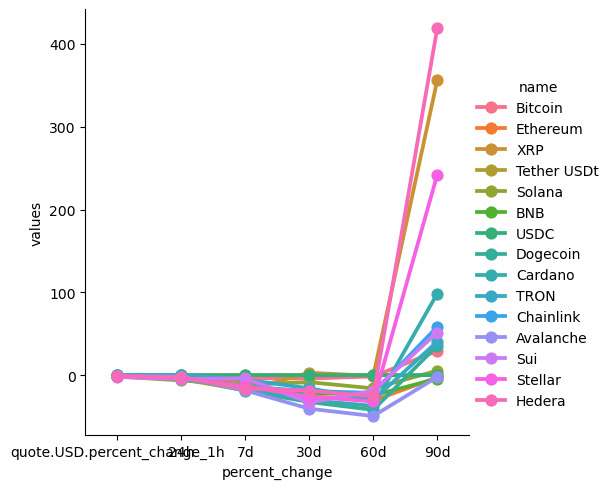

In [21]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [22]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,98164.01454,2025-02-05 16:58:21.311936


In [ ]:
df11 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'XRP'")
df10

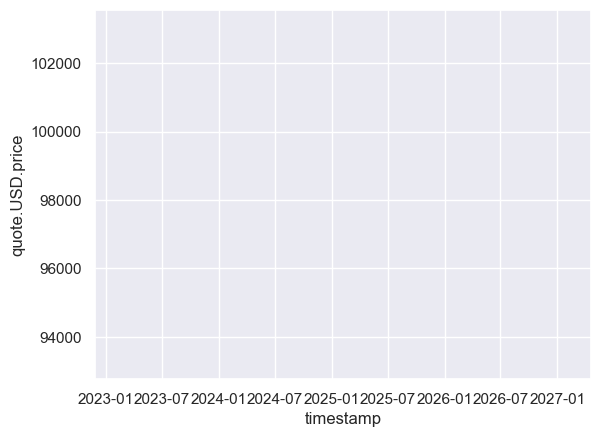

In [24]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)
plt.show()